# Unlocking Smart Growth: The Effects of a Proposed Transit-Oriented

Development Law on the Puget Sound Region

Exploring the Impact of the Community and Transit-Oriented Housing Development Bill HB 2160 Across Washington State’s Central Puget Sound Region

Tiernan Martin (Futurewise)  
Alex Brennan (Futurewise)  
February 13, 2024

During the 2024 legislative session in Washington State, House of Representatives members introduced House Bill 2160, aiming to promote community and transit-oriented housing development. The bill would require cities to permit developments of a specified scale within defined distances from high-capacity transit stops. This study assesses how the development capacity increases proposed by the bill compare to existing allowances. The results show a significant potential increase in development for most areas within walking distance of transit stops. Specifically, for developable land currently zoned for lower development capacity than the bill suggests, the projected average capacity increase is an additional 1.79 floor area ratio (FAR). The bill could increase the development capacity of land near the region’s public transit network by approximately 3.6 billion square feet.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

here() starts at C:/Users/tiern/Documents/R/2024-transit-oriented-development-bill

Linking to GEOS 3.11.2, GDAL 3.7.2, PROJ 9.3.0; sf_use_s2() is TRUE


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows

In [ ]:
pugetsound_pop_growth_2010_2023 <- readRDS(here("data_outputs/pugetsound_pop_growth_2010_2023.rds"))

outside_pop_growth_2010_2023 <- readRDS(here("data_outputs/outside_pop_growth_2010_2023.rds"))

pugetsound_hu_growth_2010_2023 <- readRDS(here("data_outputs/pugetsound_hu_growth_2010_2023.rds"))

outside_hu_growth_2010_2023 <- readRDS(here("data_outputs/outside_hu_growth_2010_2023.rds"))

In [ ]:
weighted_mean <- possibly(
  .f = function(x,w,d = 2){round(digits = d, weighted.mean(x, w, na.rm = TRUE))},
  otherwise = NA)

convert_to_mi2 <- function(x){x/27878400}

## About Futurewise

[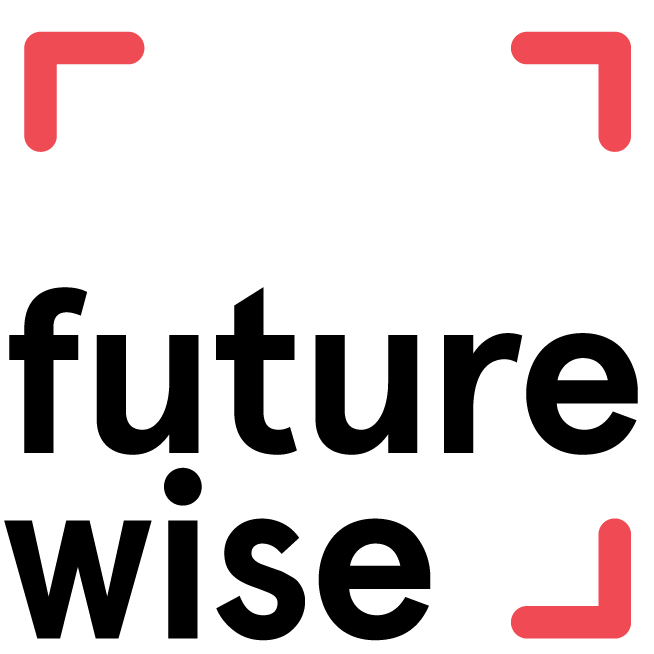](https://futurewise.org/)

Futurewise is a nonprofit organization that works throughout Washington State on the implementation of the Growth Management Act (GMA). We partner with local communities to support land use policies that encourage healthy, equitable and opportunity-rich communities, and that protect our most valuable farmlands, forests and water resources. We have members across the state including the central Puget Sound region. For more information about our organization, visit our website at <https://futurewise.org/>.

## Acknowledgments

The authors wish to express their gratitude for the support received during the preparation of this article.

No financial assistance was provided for the research, authorship, or publication of this work.

Thanks to Yonah Freemark of the Urban Institute for the provision of zoning district data. Thanks to Lauren Engel, Carol Naito, and Robin Koskey from the Puget Sound Regional Council for their generosity in sharing the agency’s public transit data and for their analysis of Washington State House Bill 2160. We are grateful to Noha Mahgoub from the Office of Governor Jay Inslee for her valuable feedback and guidance. Additionally, our thanks to Dan Bertolet of the Sightline Institute for his review and feedback on our manuscript.

## 1 Introduction

<figure>
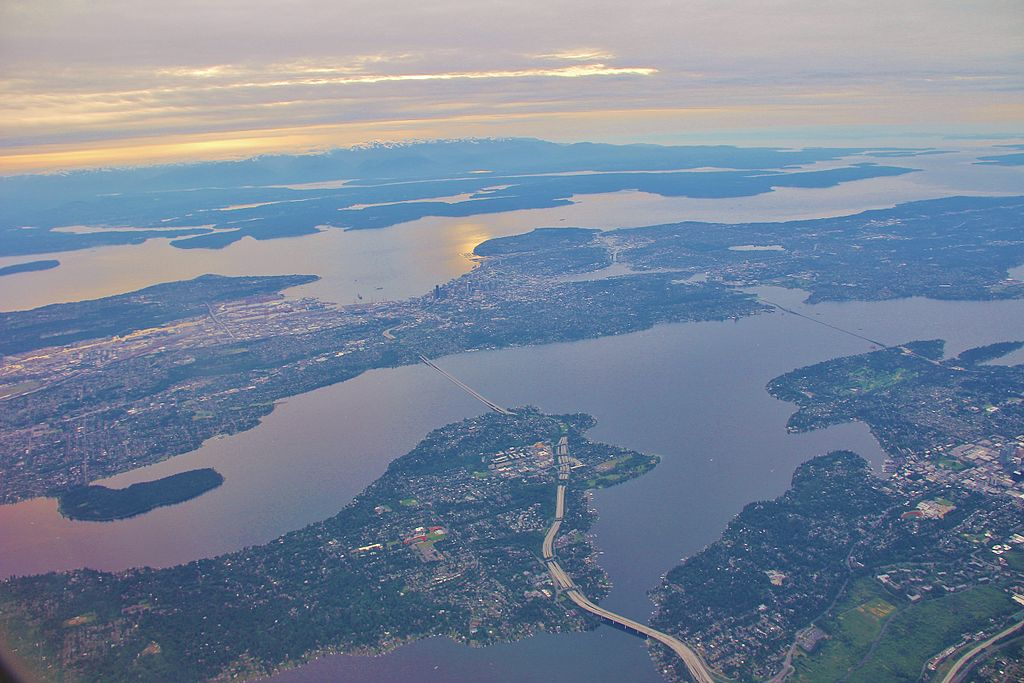
<figcaption aria-hidden="true">Central Puget Sound | Photo courtesy of <a href="#0">Clemens Vasters from Viersen, Germany</a>, <a href="#0">CC BY 2.0</a>, via Wikimedia Commons</figcaption>
</figure>

### 1.1 Growth in the Central Puget Sound Region

The Puget Sound metropolitan region is one of North America’s major growth centers for people, jobs, and housing. Between 2010 and 2023, the central Puget Sound’s four-county region (King, Kitsap, Pierce, and Snohomish counties) added more residents and housing units than the rest of Washington state combined.[1] According to forecasts by the Puget Sound Regional Council, the region’s population is expected to grow to 5.8 million people living within 2.8 million households by 2050 ([Puget Sound Regional Council 2018](#ref-pugetsoundregionalcouncil2018)).

As the region grows, it faces challenges that come with that growth. One such challenge is high, rising housing costs. The Puget Sound Regional Council’s *Housing Stability Strategy: 2023 Monitoring Report* provides several sobering statistics about the region’s housing costs. According to the report, during the decade between 2010 and 2020, the region added only one housing unit for every three new people that were born or moved there. Between July 2015 and July 2023, the median rent cost increased by 50%[2] and the annual income required to purchase the area’s median priced home was \$160,000 ([Puget Sound Regional Council 2023c](#ref-pugetsoundregionalcouncil2023)). In 2020, an estimated 11,751 people experienced homelessness within King County alone—a 5% increase from the county’s 2019 estimate ([All Home 2020](#ref-allhome2020)).

Another challenge that the central Puget Sound region faces is climate change. In 2009, the Climate Impacts Group at the University of Washington developed a climate model that projected several series climate-related impacts over the coming decades. Those impacts include water shortages in the Yakima Basin, loss of salmon habitat due to elevated stream temperatures, increased wildfire risk, and more human deaths caused by heat events and poor air quality ([Climate Impacts Group 2009](#ref-climateimpactsgroup2009)).

### 1.2 Transit-Oriented Development

One potential solution to the Puget Sound region’s challenges is to concentrate urban growth in existing urban areas while investing in climate-friendly forms of transportation. During the 1980s, sharp increases in sprawling, low-density residential and commercial development in Washington State resulted in many unintended consequences, including ecological disruption, traffic congestion, urban disinvestment, and loss of agricultural lands ([Trohimovich 2002](#ref-trohimovich2002)). This led the Washington State Legislature to adopt the Growth Management Act (GMA), a law requiring cities and counties to plan to accommodate growth within designated areas (urban growth areas or UGAs). Many of the GMA’s planning goals align with a transit-oriented development (TOD) strategy to accommodating population growth within existing urban places.[3]

The region’s metropolitan planning organization, the [Puget Sound Regional Council](https://www.psrc.org/) (PSRC), incorporates TOD into its regional growth strategy. *VISION 2050* defines regional growth centers—the places where most of the region’s growth should occur—as compact, walkable, mixed use communities centered around high-quality transit systems. This plan also adopts greenhouse gas emission reduction goals set by the [Puget Sound Clean Air Agency](https://pscleanair.gov/):

-   Reduce to 50% below 1990 levels by 2030

-   Reduce to 80% below 1990 levels by 2050

PSRC lists multiple strategies for achieving these goals, including the reduction of vehicle miles traveled by planning for transit-oriented development ([Puget Sound Regional Council 2023a](#ref-pugetsoundregionalcouncil2023a), [2022](#ref-pugetsoundregionalcouncil2022)).

### 1.3 House Bill 2160

House Bill 2160 (HB 2160) of the 2023-2024 Washington State Legislative Session proposed changes to the GMA intended to promote community and transit-oriented housing development.[4] These changes, which would apply to all cities planning under the GMA, included the following:

-   Prohibiting cities from preventing the siting of multifamily housing on residential land within transit station areas

-   Prohibiting cities from enacting maximum floor area ratio (FAR) regulation under the following thresholds: 3.5 FAR for station areas of light rail, commuter rail, or streetcars; 2.5 FAR for station areas of bus rapid transit

-   Categorically exempting residential or mixed-use projects within station areas from the State Environmental Policy Act (SEPA)

The bill also proposed several requirements of residential development built within station areas, including making at least 10% of its residential units affordable.[5]

HB 2160 defines the floor area ratio (FAR) as “a measure of development intensity equal to the building square footage divided by the developable property square footage” ([Reed 2024](#ref-reed2024)). This metric merges two commonly used regulatory tools—maximum building height and maximum lot coverage—into a single ratio. It offers developers design flexibility and allows local governments to establish a maximum level of development intensity within a zoning district. Refer to <a href="#fig-far" class="quarto-xref">Figure 1</a> for an illustration of how this tool permits various development configurations while ensuring a consistent amount of building floor area.

<figure id="fig-far">
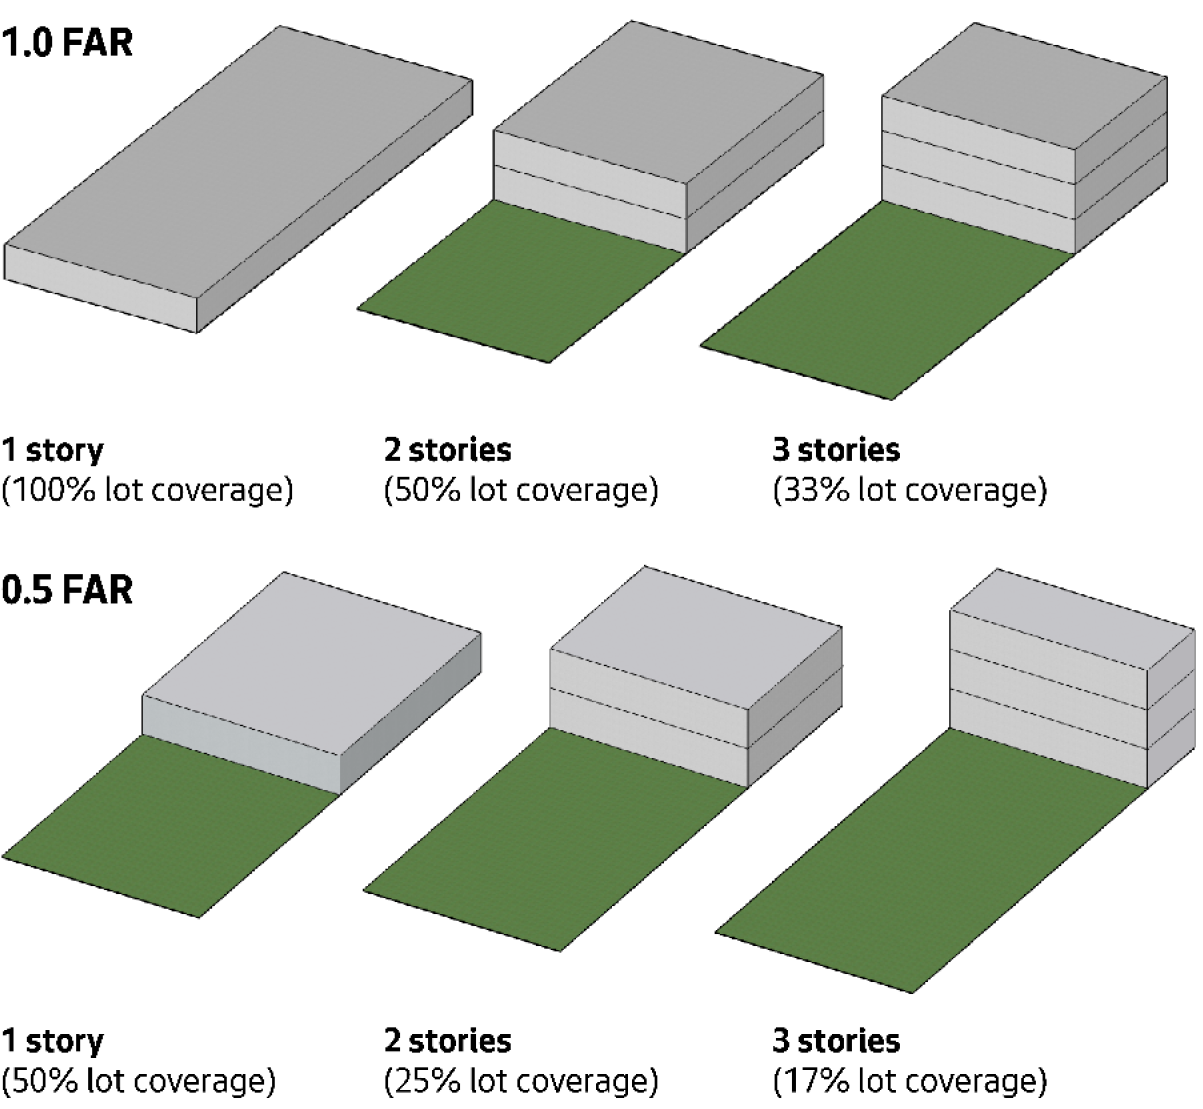
<figcaption>Figure 1: Illustrations of FAR Limits | Source: <em>Accessory Dwelling Unit Final EIS</em>, City of Seattle, 2018</figcaption>
</figure>

### 1.4 Research Questions

The purpose of this study is to provide information about the effects of the proposed HB 2160. Specifically, we seek to answer the following questions:

1.  What are the characteristics of the current land uses of the transit station areas as defined in the bill?

2.  Would this bill have an effect on the allowed development capacity of transit station areas?

3.  What is the size of any effect this bill may have?

4.  How are the bill’s effects distributed between the two station area types that it defines?

5.  What patterns are present in the cities that would be significantly impacted by the bill?

## 2 Data & Methods

### 2.1 Approach

We employ a quantitative methodology to address our research questions. First we evaluate the impact of House Bill 2160 across the entire study area, specifically the central Puget Sound region, and then proceed to analyze several individual cities as case studies.

### 2.2 Methods

HB 2160 would increase community and housing development capacity by requiring cities to adopt maximum FAR requirements no more restrictive than those specified in the bill. While some cities use maximum FAR to regulate development, many cities use other measures, the most common of which is a combination of maximum building height and maximum lot coverage. In order to accurately compare development capacity across the study area, we create a standardized measurement of development capacity which we define as follows:

<span id="eq-sdc">$$
\text{SDC}_i = 
\begin{cases} 
\text{FAR}_i & \text{if parcel } i \text{ uses FAR} \\
(\text{MBF}_i \times \text{MLC%}_i) & \text{if parcel } i \text{ does not use FAR}
\end{cases}
 \qquad(1)$$</span>

Where:

-   $\text{SDC}_i$: Standardized Development Capacity for parcel $i$

-   $\text{FAR}_i$: Floor Area Ratio for parcel $i$

-   $\text{MBF}_i$: Maximum Building Floors for parcel $i$

-   $\text{MLC%}_i$: Maximum Lot Coverage Percentage for parcel $i$

We use net development capacity (${NDC}$) to represent the effect of the bill on development capacity at the scale of individual tax parcels. We define ${NDC}$ as follows:

<span id="eq-ndc">$$
NDC_i = SDC_{new,i} - SDC_{old,i}
 \qquad(2)$$</span> Where:

-   $SDC_{old,i}$: parcel $i$’s current (standarized) maximum development capacity.
-   $SDC_{new,i}$: the (standardized) maximum development capacity that would apply to parcel $i$ if HB 2160 became law.

To quantify the impact of the proposed bill within a geography larger than an individual parcel, we calculate the area-weighted mean of net development capacity ($AWM_{NDC}$). We define ($AWM_{NDC}$) as follows:

<span id="eq-awm-ndc">$$
AWM_{NDC} = \frac{\sum_{i}(NDC_i \cdot A_i \cdot I_i)}{\sum_{i}(A_i \cdot I_i)}
 \qquad(3)$$</span>

Where:

-   $NDC_i$: the net development capacity for parcel $i$.
-   $A_i$: the geometric area of parcel $i$.
-   $I_i$: an indicator function that equals 1 if parcel $i$ satisfies all of the following conditions: it is within a station area, it lies within a zoning district where residential use is permitted, and it is within an urban growth area; otherwise, $I_i$ equals 0.

This formula ensures that the calculation exclusively incorporates parcels meeting the specified criteria, with each parcel’s contribution to the overall mean being proportionally weighted by its area.

Our method offers a metric for evaluating changes in development capacity, reflecting the effects of the proposed bill. It also allows us to summarize the bills effect at different geographic levels, including station area, city, and region. We can then both describe individual geographies (e.g., a specific station area) and compare between geographies (e.g., several cities compared individually to the region).

### 2.3 Data Collection

The study uses several data sets from a variety of different sources. The following table summarize the study’s data:

| Data                                | Description                                                                                                                                 | Citation                                                                      |
|------------------|-------------------------------------|------------------|
| Current Parcels (2023)              | A statewide data set of tax parcels                                                                                                         | Washington State Parcels Project ([2023](#ref-washingtonstateparcelsproject)) |
| Transit Stations                    | Transit station locations for light rail, commuter rail, streetcar, and existing bus rapid transit routes in the central Puget Sound Region | Puget Sound Regional Council ([2024](#ref-pugetsoundregionalcouncil2024))     |
| Puget Sound Zoning Districts (2023) | Zoning and land use regulations collected from central Puget Sound local governments’ land use codes and maps                               | Urban Institute ([2023](#ref-urbaninstitute))                                 |
| Urban Growth Areas                  | Urban growth areas for the central Puget Sound region (King, Snohomish, Kitsap, and Pierce counties)                                        | Puget Sound Regional Council ([2023b](#ref-pugetsoundregionalcouncil))        |

### 2.4 Data Analysis

The study uses a combination of a relational database and statistical software to conduct its analysis. The relational database, PostgreSQL with the PostGIS extension, is used to perform spatial filters and spatial joins on the Current Parcel data set. The R programming language is used to perform aggregations and calculate summary statistics on the filtered and augmented parcel dataset. R is also also used to produce summary tables and visualizations.

Data sets containing information relevant to HB 2160 are combined through spatial filtering and spatial joining to produce a data set of all parcels within the station areas. The refined parcel data are augmented with zoning and land use regulation information from the zoning districts. A maximum FAR baseline is estimated for all parcels, then the new maximum FAR that would be introduced by HB 2160 is estimated. For each parcel, the net difference between the current (old) and new FAR is calculated. For parcels where the current zoning allows development greater than the new FAR, the effect of the bill is considered to be zero additional FAR; for parcels where the current zoning is more restrictive that the new FAR, the effect is calculated in terms of additional FAR allowed. The bill’s effect on each parcel is then aggregated by station area, jurisdiction, and region, and summarized using the area-weight mean.[6]

### 2.5 Limitations

Our method is subject to several limitations that are important to consider when interpreting our findings:

1.  **Scope of Parcels**: The study is limited to parcels where residential use is permitted. This exclusion may omit significant areas that could be relevant under different zoning changes or future development scenarios.

2.  **Measurement of Transit Proximity**: Transit walksheds are calculated using Euclidean distance, measuring straight lines to the center of parcels, rather than using network distances that reflect actual walking paths. This method may overestimate or underestimate the true accessibility of parcels to transit services.

3.  **Lot Coverage Assumptions**: In cases where specific regulations on maximum building footprint or FAR are not provided, the study assumes that 100% lot coverage is permissible. This assumption may not align with actual zoning regulations, potentially leading to overestimations of development capacity.

4.  **Omission of Development Regulations**: The estimated FAR metric does not incorporate other development regulations, such as setbacks, which can significantly impact the buildable area on a parcel.

5.  **Homeowner Association (HOA) Restrictions**: The analysis does not consider HOA restrictions that might limit allowed density on parcels, which could reduce the impact of bill in station areas where restrictive HOA’s exist.

6.  **Housing Unit Limits Ignored**: The study does not account for maximum unit limits that can further restrict the number of residences within a given development, possibly leading to inaccurate assessments of potential housing contributions.

7.  **Regulatory Combinations Not Considered**: Interactions between different regulations, such as maximum building height and maximum FAR, are not accounted for. This omission can lead to an oversimplification of the practical limits on parcel development.

8.  **Additional Restrictions on Development**: The analysis does not account for other significant restrictions, including those that prevent development from being sited within critical areas, shoreline environments, or on sites with landmark designations. Such restrictions can materially impact development possibilities but are not reflected in the study.[7]

9.  **Currency of Data**: The study assumes that all data used in the analysis are concurrent and up-to-date. Any discrepancies in data timeliness could affect the accuracy of the results.

10. **Changing Development Regulations:** The study uses zoning and land use data collected in 2023. While Puget Sound jurisdictions will be required to update their development regulations to comply with [recent changes](https://www.commerce.wa.gov/serving-communities/growth-management/growth-management-topics/planning-for-middle-housing/) to the GMA by mid-2025, the study focuses on current development regulations.

[1] The source of these statistics are the author’s analysis of postcensial estimates by the Washington State Office of Financial Management. The central Puget Sound population grew by 414,400 people between 2010 and 2023, while the rest of the state’s population grew by 84,300 people. During the same period, 276,177 housing units were added in the this region, while 179,786 units were created elsewhere in the state.

[2] This estimate includes three of the four central Puget Sound counties: King, Pierce, and Snohomish.

[3] The first four goals of [*RCW 36.70A.020 Planning goals*](https://app.leg.wa.gov/rcw/default.aspx?cite=36.70a.020) are:

> \(1\) Urban growth. Encourage development in urban areas where adequate public facilities and services exist or can be provided in an efficient manner. (2) Reduce sprawl. Reduce the inappropriate conversion of undeveloped land into sprawling, low-density development. (3) Transportation. Encourage efficient multimodal transportation systems that will reduce greenhouse gas emissions and per capita vehicle miles traveled, and are based on regional priorities and coordinated with county and city comprehensive plans. (4) Housing. Plan for and accommodate housing affordable to all economic segments of the population of this state, promote a variety of residential densities and housing types, and encourage preservation of existing housing stock.

[4] This study uses the Second Substitute of House Bill 2160 as the basis for its analysis.

[5] The bill defines “Affordable housing” as:

> \[R\]esidential housing whose monthly costs, including utilities other than telephone, do not exceed 30 percent of the monthly income of a household whose income is: (a) For rental housing, 60 percent of the median household income-adjusted for household size, for the county where the household is located, as reported by the United States department of housing and 5urban development; or (b) For owner-occupied housing, 80 percent of the median household income adjusted for household size, for the county where 8the household is located, as reported by the United States department of housing and urban development ([Reed 2024](#ref-reed2024)).

[6] Parcels that do not allow residential uses are characterized as “not developable” and are not included in the area-weighted mean statistic; however, these parcels are included in the study’s analysis for other purposes such as describing and quantithe characteristics of land within each station area or jurisdiction.

[7] HB 2160 would exclude “public facilities and portions of lots with critical areas and critical area buffers as designated in RCW 36.70A.060, except for critical aquifer recharge areas where a single-family detached house is an allowed use provided that any requirements to maintain aquifer recharge are met.” ([Reed 2024](#ref-reed2024))

1.  **FAR Averaging**: While this study assumes that the bill’s maximum FAR standards would be uniformly applied across all eligible parcels in every station area, the Second Substitute House Bill 2160 language would allow the new FAR to be calculated as an average of the station area. Additional implementation details would be needed to accurately assess the impact that this flexilibty would have on the bill’s effect.

Further research, data collection, and methodological refinements could help address these limitations in future analyses.

## 3 Results

In [ ]:
p <- st_read(here("data_outputs/2024-tod-bill.gpkg"),
             layer = "tod-parcels",
             quiet = TRUE)

p_affected <- p |> 
  st_drop_geometry() |> 
  filter(analysis_type %in% "Developable, Affected")

undev_land_codes <- c(94, 93, 92)

t <- st_read(here("data_outputs/2024-tod-bill.gpkg"),
         layer = "transit-station-areas",
         quiet = TRUE)

zd <- st_read(here("data_outputs/2024-tod-bill.gpkg"),
         layer = "tod-zoning-districts",
         quiet = TRUE)

### 3.1 Entire Study Area

The study includes approximately 125,000 parcels ($N = 124,941$), all within the four central Puget Sound counties, within an Urban Growth Area, and within HB 2160’s specified distance thresholds of a qualifying transit stop.

We separate the study data into three analysis groups:

1.  *Not Developable*  
    Parcels that do not meet HB 2160’s eligibility criteria. The study implements these criteria by selecting parcels that which: a) are located within a zoning district that allows residential uses; and b) have a current land use that is compatible with transit-oriented development. For the current land use criterion, we use tax assessor-assigned land use codes[1] to screen out non-compatible uses such as parks, open space, forest lands, and water areas.

2.  *Developable, Not Affected*  
    Parcels that meet the study’s eligibility criteria but have an equal or higher development capacity than the bill would allow and would, therefore, not be affected by the bill.

3.  *Developable, Affected*  
    Parcels that meet the study’s eligibility criteria and have zoning that is more restrictive than the maximum FAR set by the bill and would, therefore, be affected.

We also divide the parcel data by the type of station area it is within:

1.  *Large (0.5 Mile)  
    *Parcels within a half mile of a light rail station, commuter rail station, or streetcar stop.

2.  *Small (0.25 Mile)  
    *Parcels within a quarter mile of a bus rapid transit stop and not within a *Large* station area

Using HB 2160’s definition of station areas, we create two station area types and assign one type to every parcel. Parcels that are within both *Large* and *Small* station area types as classified as part of a *Large* station area.[2]

Our study focuses on the third analysis group, *Developable, Affected*, which are the majority of the station area parcels by both count (78%) and land area (64%). We find that the total amount of additional development capacity that would be added by HB 2160 to be approximately 3.6 billion ft<sup>2</sup>.[3]

Our findings suggest that the *Large (0.5 mile)* station areas would account for the majority of the parcels (64%), land area (59%), and added development capacity (68%) associated with HB 2160. See <a href="#tbl-results-summary-table" class="quarto-xref">Table 1</a> below.

[1] The general framework for tax assessor land use codes is defined in [WAC 458-53-030](https://apps.leg.wa.gov/wac/default.aspx?cite=458-53-030).

[2] While many parcels are within more than one type of station area, our analysis sets a limit of one station area type per parcel to ensure that each parcel is only counted once during tabulation and aggregation procedures.

[3] While increasing development capacity is necessary for the production of additional housing units, it is not a sufficient condition.

In [ ]:
poss_multiply <- possibly(function(x,y) x*y, otherwise = NA,quiet = TRUE)

p_both_summaries_tbl <- p |> 
  st_drop_geometry() |>
  mutate( analysis_type = factor(analysis_type, 
                                 levels = c("Not Developable", 
                                            "Developable, Not Affected",
                                            "Developable, Affected")
  ),
  dev_capacity_added = poss_multiply(zoning_new_max_far_additional, parcel_area)
  ) |> 
  pivot_longer(cols = c(analysis_type, analysis_station_area_types)) |> 
  group_by(name, value) |> 
  summarize(n = n(),
            area_mi2 = sum(parcel_area_mi2),
            dev_capacity_added = sum(dev_capacity_added, na.rm = TRUE)) |> 
  mutate(n_pct = n / sum(n),
         area_pct = area_mi2 / sum(area_mi2),
         dev_cap_pct = dev_capacity_added / sum(dev_capacity_added, na.rm = TRUE)) |> 
  ungroup() |> 
  transmute(
    name,
    value,
    n_tbl = glue("{comma(n)} ({percent(n_pct)})"),
    area_tbl = glue("{comma(area_mi2)} ({percent(area_pct, accuracy = 1)})"),
    devcap_tbl = glue("{comma(dev_capacity_added)} ({percent(dev_cap_pct)})")
  )

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.

We use the area-weighted mean net development capacity ($AWM_{NDC}$) to summarize HB 2160’s effect across geographic scales. The $AWM_{NDC}$ for the central Puget Sound region is +1.79 FAR. Plotting the distribution of net development capacity ($NDC$) for all *Developable, Affected* parcels, we observe two modal “peaks” at +1.5 and +2.5 FAR. See <a href="#fig-results-histogram-affected" class="quarto-xref">Figure 2</a> below.

In [ ]:
wt_avg <- weighted.mean(p_affected$zoning_new_max_far_additional,
                        w = p_affected$parcel_area,
                        na.rm = TRUE) |> round(digits = 2)

p_addtl_max <- max(p_affected$zoning_new_max_far_additional, na.rm = TRUE)

n_parcels <- scales::comma(nrow(p_affected))

subtitle <- TeX("Area-weighted mean net development capacity ($AWM_{NDC}$) is 1.79 FAR, n = 97,434 parcels (78%)")

p_affected |> 
  st_drop_geometry() |>  
ggplot() +  
  aes(x = zoning_new_max_far_additional,
      weight = parcel_area_mi2) + 
  geom_histogram(binwidth = 0.25, color = "grey20", fill= "grey80") + 
  # geom_vline(xintercept = wt_avg, color = "tomato",linetype = 2, size =2) +
  scale_y_continuous(labels = scales::label_comma()) + 
  scale_x_continuous( breaks = seq(0, p_addtl_max, by = 0.25)) +
  labs(title = "HB 2160's Effect on Net Development Capacity",
       subtitle = subtitle,
       y = "Land Area (sq. miles)",
       x = "Net Development Capacity (FAR)") 

In <a href="#fig-results-histogram-station-areas" class="quarto-xref">Figure 3</a>, we compare the distribution of $NDC$ within the two station area types. The $AWM_{NDC}$ for the *Large* station areas is 2.15 FAR and $AWM_{NDC}$ for the *Small* station areas is 1.32 FAR.

In [ ]:
p_station_area <- p_affected |> 
  transmute(parcel_area_mi2,
            zoning_new_max_far_additional,
            analysis_station_area_types)

wt_avg_station_area <- p_station_area |> 
  group_by(analysis_station_area_types) |> 
    summarize(
      n = n(),
      area = sum(parcel_area_mi2, na.rm = TRUE),
      wt_avg = weighted.mean(zoning_new_max_far_additional, 
                             w = parcel_area_mi2,
                             na.rm = TRUE)
    )
  
p_addtl_max <- max(p_station_area$zoning_new_max_far_additional, na.rm = TRUE)

subtitle <- TeX("Large Station Area $AWM_{NDC}$ is 2.15 FAR, Small Station Area $AWM_{NDC}$ is 1.32 FAR")

p_station_area |> 
ggplot() +  
  aes(x = zoning_new_max_far_additional,
      weight = parcel_area_mi2,
      group = analysis_station_area_types) + 
  geom_histogram(binwidth = 0.25, color = "grey20", fill= "grey80") +  
  scale_y_continuous(labels = scales::label_comma()) + 
  scale_x_continuous( breaks = seq(0, p_addtl_max, by = 0.25)) +
  facet_wrap(~ analysis_station_area_types, scales = "fixed", ncol = 1) +
  labs(title = "HB 2160's Effect on Net Development Capacity by Station Area Type",
       subtitle = subtitle,
       y = "Land Area (sq. miles)",
       x = "Net Development Capacity (FAR)") 

Summarizing $AWM_{NDC}$ of *Developable, Affected* parcels by station area reveals a more detailed picture of the effects of HB 2160 across the central Puget Sound region:

In [ ]:
t_join <- st_join(t,
                  filter(p, analysis_type %in% "Developable, Affected"))

t_map <-  t_join |>
  st_drop_geometry() |>
  group_by(mode, stop_name) |>
  summarize(.groups = "drop",
            parcel_n = n(),
            area_wt_old_far = round(
              weighted.mean(zoning_est_max_far,
                            parcel_area,
                            na.rm = TRUE), 2),
            parea_wt_new_far = round(
              weighted.mean(zoning_new_max_far,
                            parcel_area,
                            na.rm = TRUE), 2),
            area_wt_mean_net_dev_cap = round(
              weighted.mean(zoning_new_max_far_additional,
                                            parcel_area,
                                            na.rm = TRUE), 2)) |>
  ungroup() |>
  left_join(t) |>
  st_sf()

Joining with `by = join_by(mode, stop_name)`

### 3.2 Case Studies

In order to better understand how the effects of HB 2160 may differ from place to place, we examine four cities as case studies: Kent, Mercer Island, Redmond, and Shoreline. These cities provide a range different contexts under which we can examine the effects of the proposed bill.

In [ ]:
case_studies <- c("Shoreline",
                  "Redmond",
                  "Mercer Island",
                  "Kent"
                  )

ps_cities <- st_read(
  quiet = TRUE,
  here("data_outputs/2024-tod-bill.gpkg"),
  layer = "ps-cities-pop-hu") |> 
  st_transform(2926) |> 
  mutate(area = st_area(geom),
         area_mi2 = as.numeric(convert_to_mi2(area))
)


st_join(t,ps_cities) |> 
  st_drop_geometry() |> 
  filter(name %in% case_studies) |> 
  group_by(name, mode) |> 
  summarize(.groups = "drop",
            n = n()) |> 
  pivot_wider(names_from = mode,values_from = n,values_fill = 0L) |> 
  mutate(SC = 0L) |> 
  left_join(st_drop_geometry(ps_cities)) |> 
  select(-geoid, -area) |> 
  select(name, population, housing_units, area_mi2, everything()) |> 
  gt(rowname_col = "name") |> 
   tab_spanner(
    label = "Population & Housing",
    columns = c(population, housing_units, area_mi2)
  ) |>
  tab_spanner(
    label = "Transit Station Areas",
    columns = c(LR, CR, SC, BRT)
  ) |> 
  fmt_number( 
    decimals = 0,       
    sep_mark = ","
  ) |> 
  cols_label(population = "Population",
             housing_units = "Housing Units",
             area_mi2 = html("Land Area (mi<sup>2</sup>)")) |> 
   tab_source_note(
    source_note = "Sources: American Community Survey, 2022 ACS 5-Year Estimates; authors' analysis of transit stop data from Puget Sound Regional Council 2024"
    )

Joining with `by = join_by(name)`

Grouping the study data by city and analysis group, we find that there is a significant amount of variation between the cities. The vast majority of parcels in Redmond and Mercer Island’s station areas would see their development capacity increased by the bill. However, by weighting the station areas by the area of land affected, we find that the bill’s impact is slightly more modest among the case study cities.

In [ ]:
col_names_city <- c("City",
                    "Analysis Group",
                    "Parcels (n)", 
                    "Land Area (sq. miles)")

p_cities <- p |> 
  st_drop_geometry() |> 
  filter(zoning_juris %in% case_studies)

p_cities_affected <- p_affected |>  
  filter(zoning_juris %in% case_studies)

p_cities |> 
  group_by(zoning_juris, analysis_type) |> 
  summarize(.groups = "drop",
            n = n(),
            area = 
              round(digits = 2,
                    sum(parcel_area_mi2, na.rm = TRUE))
            ) |> 
  group_by(zoning_juris) |> 
  mutate(n_total = sum(n),
         area_total = sum(area)) |> 
  group_by(zoning_juris, analysis_type) |> 
  summarize(
    n = glue("{comma(n)} ({percent(n/n_total)})"),
    area = glue("{area} ({percent(area/area_total)})")
  ) |> 
  ungroup() |>  
  gt(rowname_col = "analysis_type" ,
     groupname_col = "zoning_juris",
     process_md = TRUE) |> 
  cols_label(
    n = "Parcels (n)",
    area = html("Land Area (mi<sup>2</sup>)")
  ) |> 
  tab_style(
    style = list(
      cell_text(indent = px(20))),
    locations = cells_stub()
  )

`summarise()` has grouped output by 'zoning_juris'. You can override using the
`.groups` argument.

Calculating area-weighted mean net development capacity ($AWM_{NDC}$) and total net development capacity (${\sum(NDC)}$) for each of case study city highlights Mercer Island as an outlier—both in terms of its small amount of transit station area land and in terms of the relatively high average increase to net development capacity that would be caused by HB 2160. See <a href="#tbl-results-case-studies-results-by-city" class="quarto-xref">Table 4</a> below.

In [ ]:
case_study_results <- p_affected |> 
  filter(zoning_juris %in% case_studies) |> 
st_drop_geometry() |>
  group_by(zoning_juris) |> 
  summarise(.groups = "drop",
            n = n(),
            area = sum(parcel_area_mi2, na.rm = TRUE),
            awm_ndc = weighted_mean(x = zoning_new_max_far_additional,
                                    w = parcel_area_mi2)) |> 
  mutate(area_ndc_mi2 = poss_multiply(area, awm_ndc),
         area_ndc_ft2 = area_ndc_mi2 * 27878400) 

case_study_results |> 
  select(-area_ndc_mi2) |> 
  gt(rowname_col = "zoning_juris") |> 
  cols_label(
    n = "Parcels (n)",
    area = html("Land Area (mi<sup>2</sup>)"),
    awm_ndc = html("<i><sub>AWM_NDC</sub></i>"),
    area_ndc_ft2 = html("Net Dev. Capacity (ft<sup>2</sup>)")
  ) |> 
  fmt_number( 
    columns = c(2,5),
    decimals = 0,       
    sep_mark = ","
  ) |> 
  fmt_number( 
    columns = c(3,4),
    decimals = 2
  )

In [ ]:
city_awmndc <- p_affected |> 
  st_drop_geometry() |> 
  group_by(zoning_juris) |> 
  summarize(analysis_awmndc = weighted.mean(na.rm = TRUE,
    zoning_new_max_far_additional,
    w = parcel_area_mi2
  ))

case_studies_awmndc <- city_awmndc |> 
  filter(zoning_juris %in% case_studies)

kent_awmndc <- case_studies_awmndc |> 
  filter(zoning_juris %in% "Kent") |> 
  pluck("analysis_awmndc") |> 
  round(digits = 2)

mercerisland_awmndc <- case_studies_awmndc |> 
  filter(zoning_juris %in% "Mercer Island") |> 
  pluck("analysis_awmndc") |> 
  round(digits = 2)

redmond_awmndc <- case_studies_awmndc |> 
  filter(zoning_juris %in% "Redmond") |> 
  pluck("analysis_awmndc") |> 
  round(digits = 2)

shoreline_awmndc <- case_studies_awmndc |> 
  filter(zoning_juris %in% "Shoreline") |> 
  pluck("analysis_awmndc") |> 
  round(digits = 2)

case_studies_by_stationarea_type <- p |> 
  st_drop_geometry() |> 
  filter(zoning_juris %in% case_studies) |> 
  group_by(zoning_juris, 
           analysis_station_area_types,
           analysis_type) |> 
  summarize(.groups = "drop",
            n = n(),
            area = round(digits = 2, sum(parcel_area_mi2,na.rm = TRUE)),
            net_dev_cap = weighted.mean(na.rm = TRUE,
                                        zoning_new_max_far_additional,
                                        w = parcel_area_mi2
                                        )
            ) |> 
  mutate(net_dev_cap = if_else(is.nan(net_dev_cap),NA,net_dev_cap))

#### 3.2.1 Kent

In [ ]:
t_kent <- st_join(t, ps_cities) |>  
  filter(name %in% "Kent") |> 
  transmute(
    mode,
    stop_name
  )

kent <- ps_cities |> 
  filter(name %in% "Kent")

p_kent <- p |> 
  filter(zoning_juris %in% "Kent") |>   
  select(parcel_area_mi2,
         zoning_district_name,
         net_dev_capacity = zoning_new_max_far_additional)

p_affected_kent <- p |>  
  filter(analysis_type %in% "Developable, Affected") |> 
  filter(zoning_juris %in% "Kent") |>   
  select(parcel_area_mi2,
         analysis_station_area_types,
         net_dev_capacity = zoning_new_max_far_additional) 

kent_by_stationarea_type <- 
  case_studies_by_stationarea_type |> 
  filter(zoning_juris %in% "Kent")

<figure>
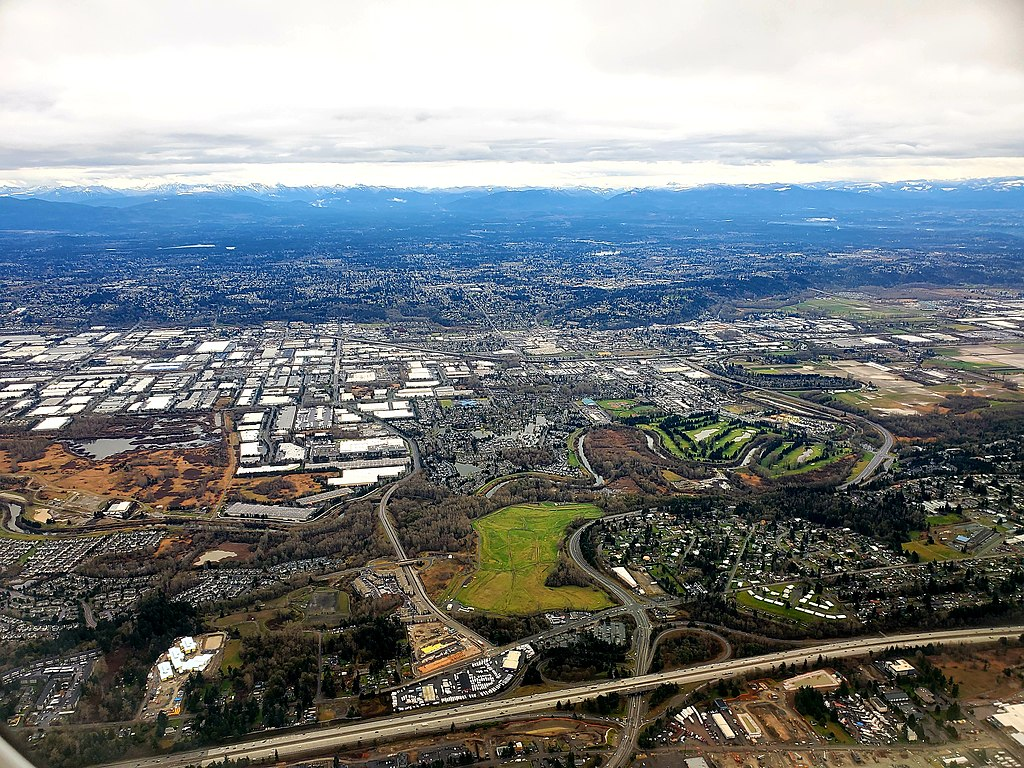
<figcaption aria-hidden="true">Kent, WA | Photo courtesy of <a href="https://commons.wikimedia.org/wiki/File:Kent_Washington_Above.jpg">Imogen Caroline</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons</figcaption>
</figure>

Kent is a city located in King County, Washington. The city has approximate 135,000 residents. Between 2010 and 2020, the city’s population increased by 47.8% ([Puget Sound Regional Council 2021](#ref-pugetsoundregionalcouncil2021)).

HB 2160 would affect several station areas within Kent’s city boundary, including two light rail stations, one commuter rail station, and 15 bus rapid transit stations. See <a href="#tbl-appendix-case-studies-kent-stations-table" class="quarto-xref">Table 8</a> in the appendix for a complete list of the station areas in Kent.

In [ ]:
map_kent <- mapview(kent,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_kent_stations_baselayer <- mapview(t_kent,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "gray",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_kent_stations <- map_kent + 
  mapview(t_kent,
          zcol = "mode",
          col.regions = brewer.pal(3, "Set2"),
          legend = TRUE,
          layer.name = "Station Area Type",
          popup = FALSE,
          label = "stop_name")

map_kent_stations

We find the area-weighted mean net development capacity ($AWM_{NDC}$) for Kent’s station areas to be 2.07 FAR. This metric summarizes HB 2160’s effect on the *Developable, Affected* parcels in the city’s station areas, which includes 69% of the station area parcels and 62% of the station area land.

In [ ]:
kent_hist_subtitle <- TeX("Area-weighted mean net development capacity ($AWM_{NDC}$) is 2.07 FAR, n = 1,195 (69%)")

p_affected_kent |>
ggplot() +
  aes(x = net_dev_capacity,
      weight = parcel_area_mi2) +
  geom_histogram(binwidth = 0.25, color = "grey20", fill= "grey80") +
  scale_y_continuous(labels = scales::label_comma()) +
  scale_x_continuous( breaks = seq(0, p_addtl_max, by = 0.25)) +
  labs(title = "HB 2160's Effect on Net Development Capacity in Kent, WA",
       subtitle = kent_hist_subtitle,
       y = "Land Area (sq. miles)",
       x = "Net Development Capacity (FAR)")

Examining the data grouped by station area type, we observe two patterns. First, there are a significant number of *Not Developable* parcels in the half-mile station areas. Second, the *Developable, Affected* parcels in both types of station areas would be substantially affected by HB 2160, as indicated by the relatively large $AWM_{NDC}$ values in <a href="#tbl-results-case-studies-kent-station-areas" class="quarto-xref">Table 5</a>.

In [ ]:
kent_by_stationarea_type |> 
  select(-zoning_juris) |> 
  gt(rowname_col = "analysis_type",
     groupname_col = "analysis_station_area_types") |> 
  cols_label(
    n = "Parcels (n)",
    area = html("Land Area (mi<sup>2</sup>)"),
    net_dev_cap = html("<i>AWM<sub>NDC</sub></i>")
  ) |> 
  tab_style(
    style = list(cell_text(indent = px(20))),
    locations = cells_stub()
  ) |> 
  fmt_number( 
    columns = c(4,5),
    decimals = 2,       
    sep_mark = ","
  )

Displaying the net development capacity of individual parcels reveals a more nuanced pattern around Kent’s station areas, as shown in <a href="#fig-results-case-studies-kent-maps" class="quarto-xref">Figure 7</a>.

In [ ]:
map_kent <- mapview(kent,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_kent_stations_baselayer <- mapview(t_kent,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "white",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_kent_parcels <- map_kent_stations_baselayer +
  mapview(p_kent,
          zcol = "net_dev_capacity",
          legend = TRUE,
          layer.name = "Net FAR",
          popup = "zoning_district_name"
            )

map_kent_parcels

#### 3.2.2 Mercer Island

In [ ]:
t_mercerisland <- st_join(t, ps_cities) |>  
  filter(name %in% "Mercer Island") |> 
  transmute(
    mode,
    stop_name
  )

mercerisland <- ps_cities |> 
  filter(name %in% "Mercer Island")

p_mercerisland <- p |> 
  filter(zoning_juris %in% "Mercer Island") |>   
  select(parcel_area_mi2,
         zoning_district_name,
         net_dev_capacity = zoning_new_max_far_additional)

p_affected_mercerisland <- p |>  
  filter(analysis_type %in% "Developable, Affected") |> 
  filter(zoning_juris %in% "Mercer Island") |>   
  select(parcel_area_mi2,
         analysis_station_area_types,
         net_dev_capacity = zoning_new_max_far_additional) 

mercerisland_by_stationarea_type <- 
  case_studies_by_stationarea_type |> 
  filter(zoning_juris %in% "Mercer Island")

<figure>
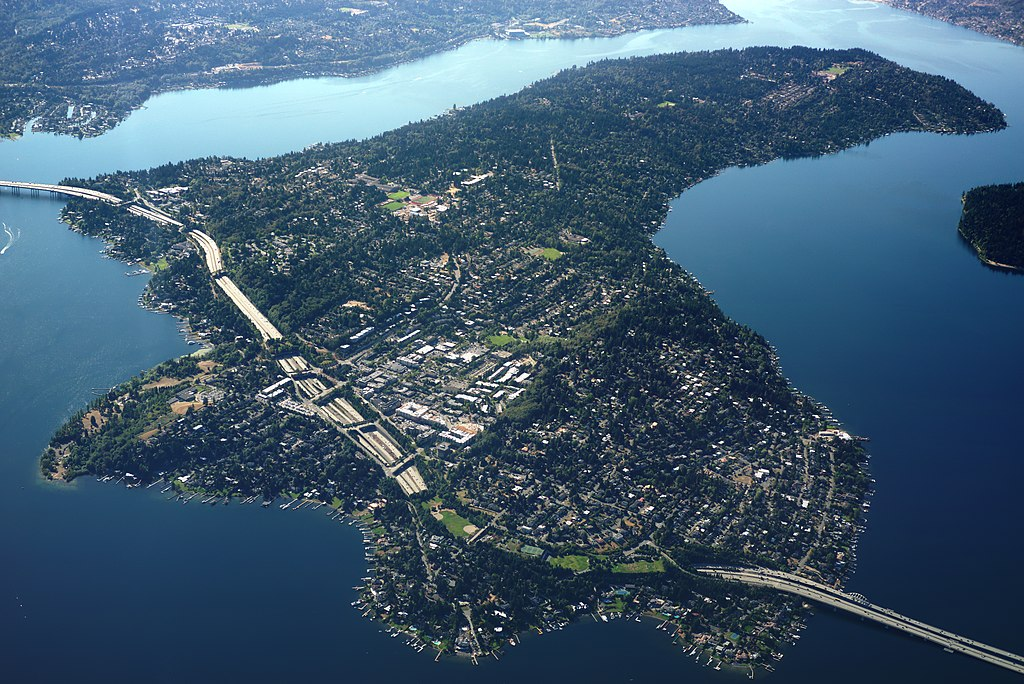
<figcaption aria-hidden="true">Mercer Island, WA | Photo courtest of <a href="https://commons.wikimedia.org/wiki/File:Aerial_photo_of_Mercer_Island,_Washington.jpg">Dllu</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons</figcaption>
</figure>

Mercer Island is a city located in King County, Washington. The city has approximate 25,000 residents. Between 2010 and 2020, the city’s population increased by 13.4% ([Puget Sound Regional Council 2021](#ref-pugetsoundregionalcouncil2021)).

HB 2160 would affect only one station area within the city boundary: the Mercer Island Light Rail station. Only three other cities share Mercer Island’s situation by having a single transit station area that meets HB 2160’s criteria; they are Mukilteo, DuPont, and University Place.

In [ ]:
map_mercerisland <- mapview(mercerisland,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_mercerisland_stations_baselayer <- mapview(t_mercerisland,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "gray",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_mercerisland_stations <- map_mercerisland + 
  mapview(t_mercerisland,
          zcol = "mode",
          col.regions = brewer.pal(3, "Set2"),
          legend = TRUE,
          layer.name = "Station Area Type",
          popup = FALSE,
          label = "stop_name")

map_mercerisland_stations

We find the area-weighted mean net development capacity ($AWM_{NDC}$) for Mercer Island’s light rail station area to be 3.01 FAR. This metric summarizes HB 2160’s effect on the *Developable, Affected* parcels in the city’s station area, which includes 87% of the station area parcels and 69% of the station area land.

In [ ]:
mercerisland_hist_subtitle <- TeX("Area-weighted mean net development capacity ($AWM_{NDC}$) is 3.01 FAR, n = 550 parcels (87%)")

p_affected_mercerisland |>
ggplot() +
  aes(x = net_dev_capacity,
      weight = parcel_area_mi2) +
  geom_histogram(binwidth = 0.25, color = "grey20", fill= "grey80") +
  scale_y_continuous(labels = scales::label_comma()) +
  scale_x_continuous( breaks = seq(0, p_addtl_max, by = 0.25)) +
  labs(title = "HB 2160's Effect on Net Development Capacity in Mercer Island, WA",
       subtitle = mercerisland_hist_subtitle,
       y = "Land Area (sq. miles)",
       x = "Net Development Capacity (FAR)")

Displaying the net development capacity of individual parcels reveals a clear pattern around Mercer Island’s light rail station area, as shown in <a href="#fig-results-case-studies-mercerisland-maps" class="quarto-xref">Figure 10</a>. Aside from the Town Center zoning district, which already allows buildings with up to 4 FAR, the station area parcels have an area-weighted average FAR of 0.49—significantly lower than the maximum FAR that HB 2160 would introduce.

In [ ]:
mercerisland_mean_current_far <- p |> 
  filter(zoning_juris == "Mercer Island") |>
  filter(analysis_type == "Developable, Affected") |> 
  summarize(mean = weighted.mean(zoning_est_max_far,
                                 parcel_area, 
                                 na.rm = TRUE))

map_mercerisland <- mapview(mercerisland,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_mercerisland_stations_baselayer <- mapview(t_mercerisland,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "white",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_mercerisland_parcels <- map_mercerisland_stations_baselayer +
  mapview(p_mercerisland,
          zcol = "net_dev_capacity",
          legend = TRUE,
          layer.name = "Net FAR",
          popup = "zoning_district_name"
            )

map_mercerisland_parcels

#### 3.2.3 Redmond

<figure>
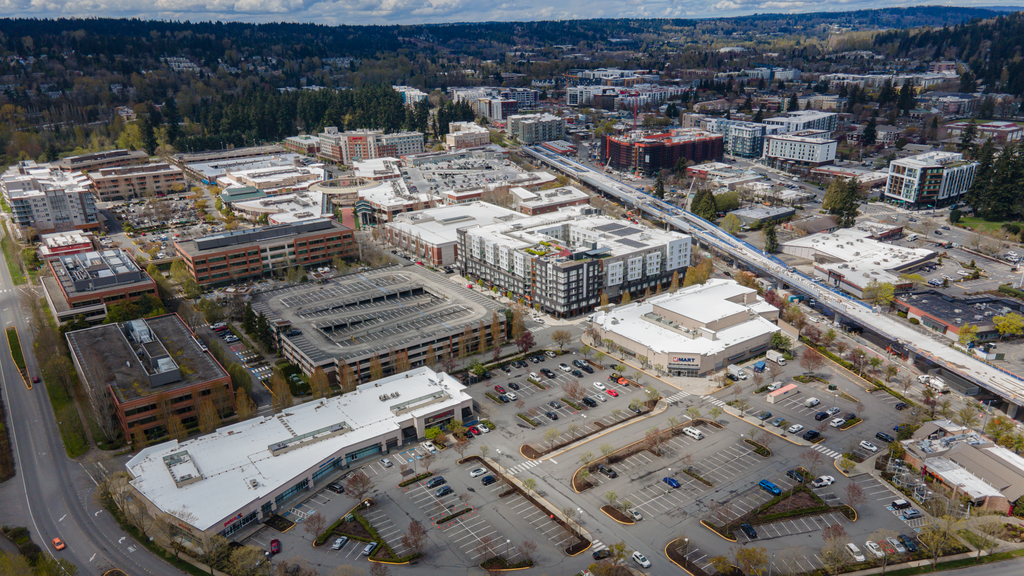
<figcaption aria-hidden="true">Redmond, WA | Photo courtesy of <a href="https://commons.wikimedia.org/wiki/File:Redmond_aerial,_April_2023.png">Spicypepper999</a>, CC0, via Wikimedia Commons</figcaption>
</figure>

In [ ]:
t_redmond <- st_join(t, ps_cities) |>  
  filter(name %in% "Redmond") |> 
  transmute(
    mode,
    stop_name
  )

redmond <- ps_cities |> 
  filter(name %in% "Redmond")

p_redmond <- p |> 
  filter(zoning_juris %in% "Redmond") |>   
  select(parcel_area_mi2,
         zoning_district_name,
         net_dev_capacity = zoning_new_max_far_additional)

p_affected_redmond <- p |>  
  filter(analysis_type %in% "Developable, Affected") |> 
  filter(zoning_juris %in% "Redmond") |>   
  select(parcel_area_mi2,
         zoning_district_name,
         analysis_station_area_types,
         net_dev_capacity = zoning_new_max_far_additional) 

redmond_by_stationarea_type <- 
  case_studies_by_stationarea_type |> 
  filter(zoning_juris %in% "Redmond")

Redmond is a city located in King County, Washington. The city has approximate 74,000 residents. Between 2010 and 2020, the city’s population increased by 35.3% ([Puget Sound Regional Council 2021](#ref-pugetsoundregionalcouncil2021)).

HB 2160 would affect several station areas within Redmond’s city boundary, including four light rail stations and approximately 30 bus rapid transit stations.[1] See <a href="#tbl-appendix-case-studies-redmond-stations-table" class="quarto-xref">Table 9</a> in the appendix for a complete list of the station areas in Redmond.

[1] While most of the bus rapid transit stations are spatially distinct, there are several cases where two BRT stations appear to be in the same location. One example is Redmond Transit Center, where both Bay 1 and Bay 4 are included in the study’s transit stop dataset even though they have (approximately) the same station area. This situation affect six BRT stops / three distinct station areas in total.

In [ ]:
map_redmond <- mapview(redmond,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_redmond_stations_baselayer <- mapview(t_redmond,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "gray",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_redmond_stations <- map_redmond + 
  mapview(t_redmond,
          zcol = "mode",
          col.regions = brewer.pal(3, "Set2"),
          legend = TRUE,
          layer.name = "Station Area Type",
          popup = FALSE,
          label = "stop_name")

map_redmond_stations

We find the area-weighted mean net development capacity ($AWM_{NDC}$) for Redmond’s station areas to be +1.67 FAR. This metric summarizes HB 2160’s effect on the *Developable, Affected* parcels in the city’s station areas, which includes 90% of the station area parcels (1,336 parcels) and 76% of the station area land (2.09 mi<sup>2</sup>).

In [ ]:
redmond_hist_subtitle <- TeX("Area-weighted mean net development capacity ($AWM_{NDC}$) is 1.67 FAR, n = 1,336 (90%)")

p_affected_redmond |>
ggplot() +
  aes(x = net_dev_capacity,
      weight = parcel_area_mi2) +
  geom_histogram(binwidth = 0.25, color = "grey20", fill= "grey80") +
  scale_y_continuous(labels = scales::label_comma()) +
  scale_x_continuous( breaks = seq(0, p_addtl_max, by = 0.25)) +
  labs(title = "HB 2160's Effect on Net Development Capacity in Redmond, WA",
       subtitle = redmond_hist_subtitle,
       y = "Land Area (sq. miles)",
       x = "Net Development Capacity (FAR)")

Examining the data grouped by station area type, we observe that while both station area types contain a similar number of *Developable, Affected* parcels, the *Large* station areas include substantially more land area that would be affected by the bill. Additionally, the $AWM_{NDC}$ of Redmond’s *Large* station areas is substantially higher than the *Small* station areas (+1.92 FAR and + 1.14 FAR, respectively).

In [ ]:
redmond_by_stationarea_type |> 
  select(-zoning_juris) |> 
  gt(rowname_col = "analysis_type",
     groupname_col = "analysis_station_area_types") |> 
  cols_label(
    n = "Parcels (n)",
    area = html("Land Area (mi<sup>2</sup>)"),
    net_dev_cap = html("<i>AWM<sub>NDC</sub></i>")
  ) |> 
  tab_style(
    style = list(cell_text(indent = px(20))),
    locations = cells_stub()
  ) |> 
  fmt_number( 
    columns = c(4,5),
    decimals = 2,       
    sep_mark = ","
  )

Displaying the net development capacity of individual parcels reveals a complicated pattern around Redmond’s station areas, as shown in <a href="#fig-results-case-studies-redmond-maps" class="quarto-xref">Figure 13</a>. While there are a few neighborhoods that would not be affected, such as Redmond Town Center and the manufacturing park on the north, the majority of parcels within the transit station areas would have their maximum development capacity increased by HB 2160. The Overlake Mixed-Use zoning district would see substantial increase to its total development capacity (+43M ft<sup>2</sup>).

In [ ]:
p_affected_redmond |> 
  st_drop_geometry() |> 
  group_by(zoning_district_name) |> 
summarise(.groups = "drop",
          n = n(),
          area = sum(parcel_area_mi2, na.rm = TRUE),
          awm_ndc = weighted_mean(x = net_dev_capacity,
                                  w = parcel_area_mi2)) |> 
  mutate(area_ndc_mi2 = poss_multiply(area, awm_ndc),
         area_ndc_ft2 = area_ndc_mi2 * 27878400) |> 
  arrange(desc(area_ndc_mi2))

# A tibble: 17 × 6
   zoning_district_name     n    area awm_ndc area_ndc_mi2 area_ndc_ft2
   <chr>                <int>   <dbl>   <dbl>        <dbl>        <dbl>
 1 Overlake Mixed-Use     118 0.924      1.67      1.54       43013571.
 2 Single-Family Urban    741 0.360      1.5       0.540      15046369.
 3 Marymoor Design         27 0.0915     2.85      0.261       7269631.
 4 Town Square             70 0.0858     1.85      0.159       4425050.
 5 East Hill              121 0.0566     2.5       0.142       3945004.
 6 Multifamily Urban       53 0.216      0.64      0.138       3848447.
 7 Anderson Park           65 0.0583     2.25      0.131       3655002.
 8 Business Park           11 0.0611     2.04      0.125       3474646.
 9 General Commercial      23 0.0373     2.7       0.101       2808359.
10 Bear Creek              19 0.0418     2.25      0.0941      2622351.
11 Old Town                49 0.0372     2.25      0.0836      2331324.
12 Sammamish Trail         13 0.0582     1.25

In [ ]:
map_redmond <- mapview(redmond,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_redmond_stations_baselayer <- mapview(t_redmond,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "white",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_redmond_parcels <- map_redmond_stations_baselayer +
  mapview(p_redmond,
          zcol = "net_dev_capacity",
          legend = TRUE,
          layer.name = "Net FAR",
          popup = "zoning_district_name"
            )

map_redmond_parcels

#### 3.2.4 Shoreline

<figure>
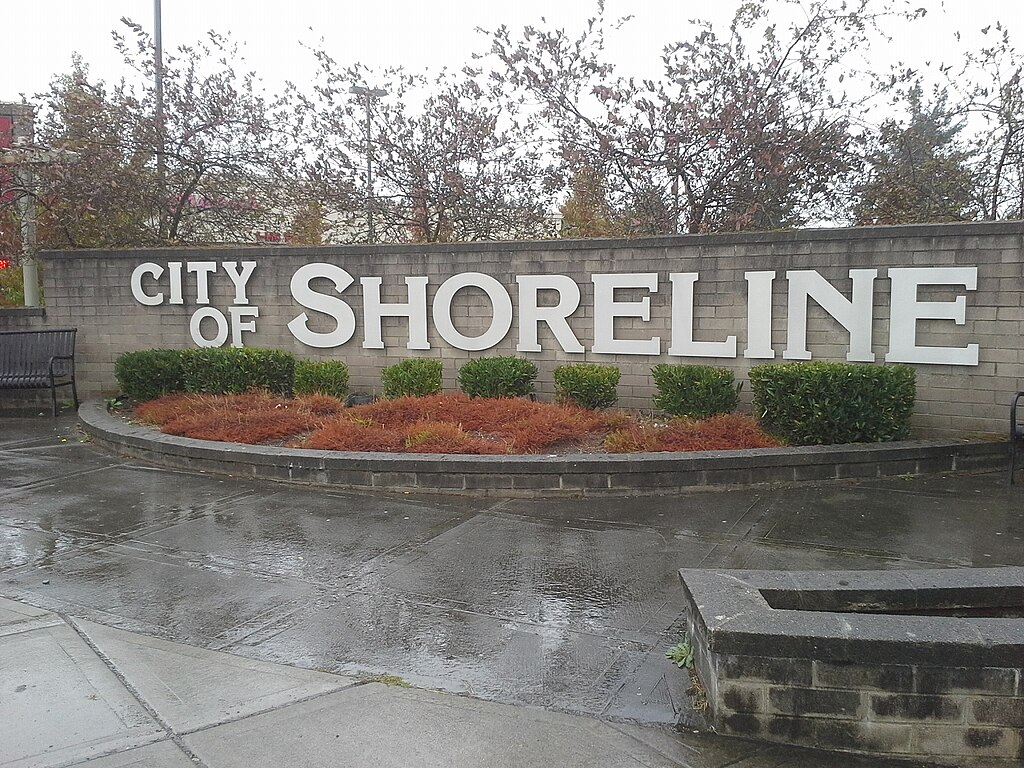
<figcaption aria-hidden="true">City of Shoreline, WA | Photo courtesy of <a href="https://commons.wikimedia.org/wiki/File:City_of_Shoreline_sign_at_145th_and_Aurora.jpg">Haruo</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons</figcaption>
</figure>

In [ ]:
t_shoreline <- st_join(t, ps_cities) |>  
  filter(name %in% "Shoreline") |> 
  transmute(
    mode,
    stop_name
  )

shoreline <- ps_cities |> 
  filter(name %in% "Shoreline")

p_shoreline <- p |> 
  filter(zoning_juris %in% "Shoreline") |>   
  select(parcel_area_mi2,
         zoning_district_name,
         net_dev_capacity = zoning_new_max_far_additional)

p_affected_shoreline <- p |>  
  filter(analysis_type %in% "Developable, Affected") |> 
  filter(zoning_juris %in% "Shoreline") |>   
  select(parcel_area_mi2,
         zoning_district_name,
         analysis_station_area_types,
         net_dev_capacity = zoning_new_max_far_additional) 

shoreline_by_stationarea_type <- 
  case_studies_by_stationarea_type |> 
  filter(zoning_juris %in% "Shoreline")

Shoreline is a city located in King County, Washington. The city has approximate 58,700 residents. Between 2010 and 2020, the city’s population increased by 10.6% ([Puget Sound Regional Council 2021](#ref-pugetsoundregionalcouncil2021)).

HB 2160 would affect several station areas within Shoreline’s city boundary, including two light rail stations and approximately 30 bus rapid transit stations.[1] See <a href="#tbl-appendix-case-studies-shoreline-stations-table" class="quarto-xref">Table 10</a> in the appendix for a complete list of the station areas in Shoreline.

[1] While most of the bus rapid transit station areas are spatially distinct, the Aurora Village Transit Center constitutes two stations (Bay 10 and Bay 3) in the study data set even though they have (approximately) the same station area.

In [ ]:
map_shoreline <- mapview(shoreline,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_shoreline_stations_baselayer <- mapview(t_shoreline,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "gray",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_shoreline_stations <- map_shoreline + 
  mapview(t_shoreline,
          zcol = "mode",
          col.regions = brewer.pal(3, "Set2"),
          legend = TRUE,
          layer.name = "Station Area Type",
          popup = FALSE,
          label = "stop_name")

map_shoreline_stations

We find the area-weighted mean net development capacity ($AWM_{NDC}$) for Shoreline’s station areas to be +1.65 FAR. This metric summarizes HB 2160’s effect on the *Developable, Affected* parcels in the city’s station areas, which includes 76% of the station area parcels (3,632 parcels) and 62% of the station area land (1.31 mi<sup>2</sup>).

In [ ]:
shoreline_hist_subtitle <- TeX("Area-weighted mean net development capacity ($AWM_{NDC}$) is 1.67 FAR, n = 1,336 (90%)")

p_affected_shoreline |>
ggplot() +
  aes(x = net_dev_capacity,
      weight = parcel_area_mi2) +
  geom_histogram(binwidth = 0.25, color = "grey20", fill= "grey80") +
  scale_y_continuous(labels = scales::label_comma()) +
  scale_x_continuous( breaks = seq(0, p_addtl_max, by = 0.25)) +
  labs(title = "HB 2160's Effect on Net Development Capacity in Shoreline, WA",
       subtitle = shoreline_hist_subtitle,
       y = "Land Area (sq. miles)",
       x = "Net Development Capacity (FAR)")

Examining the data grouped by station area type, we observe that in Shoreline the *Small* station areas make up both more parcels and more land area than the *Large* station areas. However, the $AWM_{NDC}$ of Shoreline’s *Large* station areas is substantially higher than that of the *Small* station areas (+2.23 FAR and + 1.27 FAR, respectively).

In [ ]:
shoreline_by_stationarea_type |> 
  select(-zoning_juris) |> 
  gt(rowname_col = "analysis_type",
     groupname_col = "analysis_station_area_types") |> 
  cols_label(
    n = "Parcels (n)",
    area = html("Land Area (mi<sup>2</sup>)"),
    net_dev_cap = html("<i>AWM<sub>NDC</sub></i>")
  ) |> 
  tab_style(
    style = list(cell_text(indent = px(20))),
    locations = cells_stub()
  ) |> 
  fmt_number( 
    columns = c(4,5),
    decimals = 2,       
    sep_mark = ","
  )

Displaying the net development capacity of individual parcels reveals a that most of Shorelines station areas would be significantly affected by HB 2160, as shown in <a href="#fig-results-case-studies-shoreline-maps" class="quarto-xref">Figure 16</a>. The vast majority of parcels within this city’s station areas is zoned as “Low-Density Residential”. The total net development capacity for this zoning district would be a significant increase (+54M ft<sup>2</sup>).

In [ ]:
p_affected_shoreline |> 
  st_drop_geometry() |> 
  group_by(zoning_district_name) |> 
summarise(.groups = "drop",
          n = n(),
          area = sum(parcel_area_mi2, na.rm = TRUE),
          awm_ndc = weighted_mean(x = net_dev_capacity,
                                  w = parcel_area_mi2)) |> 
  mutate(area_ndc_mi2 = poss_multiply(area, awm_ndc),
         area_ndc_ft2 = area_ndc_mi2 * 27878400) |> 
  arrange(desc(area_ndc_mi2))

# A tibble: 4 × 6
  zoning_district_name           n   area awm_ndc area_ndc_mi2 area_ndc_ft2
  <chr>                      <int>  <dbl>   <dbl>        <dbl>        <dbl>
1 Low-Density Residential     2838 1.04      1.87       1.95      54459055.
2 Medium-Density Residential   276 0.0765    1.04       0.0796     2218643.
3 Mixed-use Residential        275 0.0720    0.95       0.0684     1907562.
4 High-Density Residential     243 0.117     0.5        0.0585     1632224.

In [ ]:
map_shoreline <- mapview(shoreline,
        col.regions = "grey",
        alpha.regions = .10,
        legend = FALSE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE)

map_shoreline_stations_baselayer <- mapview(t_shoreline,
        zcol = "mode",
        col.regions = brewer.pal(3, "Set2"),
        alpha.regions = 0.2,
        color = "white",
        legend = TRUE,
        popup = FALSE,
        highlight = FALSE,
        label = FALSE,
        layer.name = "Stations") 

map_shoreline_parcels <- map_shoreline_stations_baselayer +
  mapview(p_shoreline,
          zcol = "net_dev_capacity",
          legend = TRUE,
          layer.name = "Net FAR",
          popup = "zoning_district_name"
            )

map_shoreline_parcels

## 4 Conclusion

House Bill 2160 aims to significantly increase development capacity near transit stops in the Puget Sound region, marking a meaningful move towards transit-oriented development. While this study indicates a substantial potential for new development capacity, it’s important to consider these figures as estimates due to data and methodological limitations. Future refinements in data and methodology could enhance certainty about the bill’s capacity impact. Despite these limitations, this study findings strongly suggest that this bill could have a significant impact on housing production, public transit access, and urban development in the central Puget Sound region.

## Appendices

### 4.1 Case Study Tables & Maps

#### 4.1.1 Kent

In [ ]:
t_kent |> 
  st_drop_geometry() |> 
  gt(rowname_col = "mode") |> 
  cols_label(
    stop_name = "Transit Stop/Station") |> 
  tab_style(
    style = list(
      cell_text(align = "left")),
    locations = cells_body()
  )

In [ ]:
zd_kent <- zd |> 
  filter(juris %in% "Kent") |> 
  select(district_name,
         zone,
         allow_residential:min_parking
         )

map_kent_zoning_districts <- map_kent + 
  mapview(zd_kent,
          zcol = "zone",
          col.regions = c(brewer.pal(12, "Set3"),
                          brewer.pal(8, "Set2")),
          popup = TRUE,
          layer.name = "Zoning Districts")

Trimming colors to match number of zcol values.

In [ ]:
p_kent <- p |> 
  filter(zoning_juris %in% "Kent") |> 
  select(net_dev_capacity = zoning_new_max_far_additional)

map_kent_parcels <- map_kent +  
  map_kent_stations_baselayer +
  mapview(p_kent,
          zcol = "net_dev_capacity",
          legend = TRUE,
          layer.name = "Net FAR",
          popup = "net_dev_capacity") 

map_kent_parcels

#### 4.1.2 Redmond

In [ ]:
t_redmond |> 
  st_drop_geometry() |> 
  gt(rowname_col = "mode") |> 
  cols_label(
    stop_name = "Transit Stop/Station") |> 
  tab_style(
    style = list(
      cell_text(align = "left")),
    locations = cells_body()
  )

#### 4.1.3 Shoreline

In [ ]:
t_shoreline |> 
  st_drop_geometry() |> 
  gt(rowname_col = "mode") |> 
  cols_label(
    stop_name = "Transit Stop/Station") |> 
  tab_style(
    style = list(
      cell_text(align = "left")),
    locations = cells_body()
  )

## References

All Home. 2020. “Count Us in Report: Seattle/King County Point-in-Time Count of Individuals Experiencing Homeslessness.” <https://kcrha.org/wp-content/uploads/2020/06/Count-Us-In-2020-Final.pdf>.

Climate Impacts Group. 2009. “The Washington Climate Change Impacts Assessment.” <http://www.cses.washington.edu/db/pdf/wacciareport681.pdf>.

Puget Sound Regional Council. 2018. “Draft 2050 Forecast of People and Jobs.” <https://www.psrc.org/media/1749>.

———. 2021. “Puget Sound Trends, 2010-2020.” <https://www.psrc.org/media/4942>.

———. 2022. “Climate Change and Resilience Guidance.” <https://www.psrc.org/media/6869>.

———. 2023a. “VISION 2050.” <https://www.psrc.org/vision-2050>.

———. 2023b. “PSRC Data Portal.”

———. 2023c. “Regional Housing Strategy: 2023 Monitoring Report.” <https://www.psrc.org/sites/default/files/2023-11/reg-housing-strategy-monitoring-rpt-2023.pdf>.

———. 2024. “Community and Transit-Oriented Housing Development Bill 2024: An Interactive Web Map.” <https://arcg.is/0SSvK10>.

Reed, Representative Julia. 2024. “An Act Relating to Promoting Community and Transit-Oriented Housing Development,” February.

Trohimovich, Tim. 2002. “The Growth Management Act (GMA) After More Than 10 Years: Another Look & a Response to Criticisms.” *Growth*. <http://www.futurewise.org/assets/resources/GMA_another_look.pdf>.

Urban Institute. 2023. “Urban Institute Puget Sound Zoning Atlas.”

Washington State Parcels Project. 2023. “Current Parcels (2023).”